<a href="https://colab.research.google.com/github/tamojeetroychowdhury/CAB-Assignment/blob/main/SDSS_3_lineflux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astropy>=5.1
!pip install specutils
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 194 kB 6.3 MB/s 
     |████████████████████████████████| 108 kB 46.5 MB/s 
     |████████████████████████████████| 414 kB 35.3 MB/s 
     |████████████████████████████████| 11.4 MB 4.7 MB/s 
     |████████████████████████████████| 109 kB 52.6 MB/s 
     |████████████████████████████████| 195 kB 57.1 MB/s 
     |████████████████████████████████| 71 kB 92 kB/s 
     |████████████████████████████████| 69 kB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for asdf-coordinates-schemas: filename=asdf_coordinates_schemas-0.1.0-py3-none-any.whl size=19008 sha256=10eeced07ce59f89e0cc930317ad6fa2623092b91d6a61d4cb2fe4e16af8cc11
  Sto

In [24]:
from astroquery.sdss import SDSS
from specutils import Spectrum1D
from astropy import coordinates as coords
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

import warnings
warnings.simplefilter('ignore')
from scipy.signal import find_peaks
from specutils.fitting import fit_generic_continuum

from specutils.manipulation import gaussian_smooth
from specutils import SpectralRegion
from specutils.analysis import equivalent_width, line_flux

In [2]:
pos = coords.SkyCoord('15h18m33.75s 02d05m57.7s', frame='gcrs')
xid_spec = SDSS.query_region(pos, radius = '11.5m', spectro=True)
print(len(xid_spec))

d = xid_spec
mask = (d['ra']-229.64)**2 + (d['dec']-2.085)**2 <= (11/60)**2
x = d[mask]
s = SDSS.get_spectra(matches = x)

63


In [3]:
# 5581, 7202, 7148 of calcium+1, also 4227 present where 5581 isn't
# 7231, 7236 of carbon, not present
# 7180 of H2O, not present
# 8407 of TiO - present in many!
# 3883 of cyanide - present in many! 4215 of cyanide - present in several as very short peak
# 7250 of Si+ - found in two
# 7601 of Ca++, found as broad peak in some
# 7657 of Mg+, long peak in image 25, short peak in 17, almost-peak in third
# 8184, 8194 of N+, Na+ small peaks in several, mostly first line
# 8213, 8221, 8234 of Mg,O,Mg have smaller peaks in few
# 6300 (can be O or Fe but seem Fe looking at Sneden et al) line present in many! 6158 Fe+ line also present in several, mainly in images towards end
# 6154, 6161 Na lines in several, two as prominent peaks in end
# 6300 zoom-in resolution : Fe line 6301.5 present in many, several have zig-zag or two-point peaks which means both O and Fe peaks present.

In [65]:
cn = []
o = []
na = []
fe = []

for i in range(len(s)):
  specdata = s[i][1].data
  lamb = 10**specdata['loglam'] * u.AA 
  flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
  spec = Spectrum1D(spectral_axis=lamb, flux=flux)

  g1_fit = fit_generic_continuum(spec)
  y_continuum_fitted = g1_fit(lamb)

  spec -= y_continuum_fitted

  #waves = np.array([6300.7, 3839, 6161])
  #lower = (waves - 1) * u.AA
  #upper = (waves + 1) * u.AA

  #sp = SpectralRegion([[lower[i], upper[i]] for i in range(3)])

  cn.append(line_flux(spectrum = spec, regions = SpectralRegion(3837*u.AA, 3841*u.AA)))
  o.append(line_flux(spectrum = spec, regions = SpectralRegion(6298*u.AA, 6302*u.AA)))
  #na.append(line_flux(spectrum = spec, regions = SpectralRegion(6159*u.AA, 6163*u.AA)))

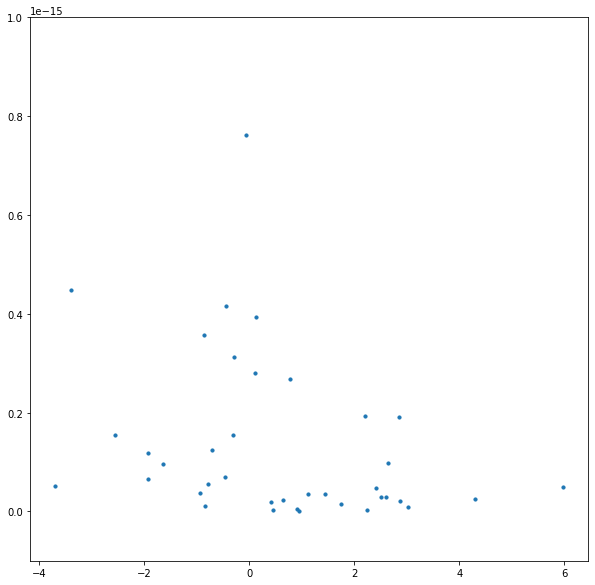

In [107]:
plt.figure(figsize = (10,10))
cn_nums = np.array([np.abs(i.value) for i in cn])
o_nums = np.array([np.abs(i.value) for i in o])
na_nums = np.array([np.abs(i.value) for i in na])
fe_nums = np.array([np.abs(i.value) for i in fe])
ofe = np.log(o_nums/fe_nums)
nafe = np.log(na_nums/fe_nums)
plt.scatter(ofe, cn_nums, s = 10)
plt.ylim(-0.1e-15,1e-15)
plt.show()

In [102]:
np.corrcoef([nafe], [cn_nums])

array([[ 1.        , -0.23410229],
       [-0.23410229,  1.        ]])

In [104]:
np.corrcoef([[1,2,3]], [[4,3,2]])

array([[ 1., -1.],
       [-1.,  1.]])

In [71]:
na = []

for i in range(len(s)):
  specdata = s[i][1].data
  lamb = 10**specdata['loglam'] * u.AA 
  flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
  spec = Spectrum1D(spectral_axis=lamb, flux=flux)

  g1_fit = fit_generic_continuum(spec)
  y_continuum_fitted = g1_fit(lamb)

  spec -= y_continuum_fitted

  #waves = np.array([6300.7, 3839, 6161])
  #lower = (waves - 1) * u.AA
  #upper = (waves + 1) * u.AA

  #sp = SpectralRegion([[lower[i], upper[i]] for i in range(3)])

  na.append(line_flux(spectrum = spec, regions = SpectralRegion(5896*u.AA, 5900*u.AA)))

In [74]:
fe = []

for i in range(len(s)):
  specdata = s[i][1].data
  lamb = 10**specdata['loglam'] * u.AA 
  flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
  spec = Spectrum1D(spectral_axis=lamb, flux=flux)

  g1_fit = fit_generic_continuum(spec)
  y_continuum_fitted = g1_fit(lamb)

  spec -= y_continuum_fitted

  #waves = np.array([6300.7, 3839, 6161])
  #lower = (waves - 1) * u.AA
  #upper = (waves + 1) * u.AA

  #sp = SpectralRegion([[lower[i], upper[i]] for i in range(3)])

  fe.append(line_flux(spectrum = spec, regions = SpectralRegion(5268*u.AA, 5272*u.AA)))

In [95]:
cn_ew

[<Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity 4.41711426 Angstrom>,
 <Quantity

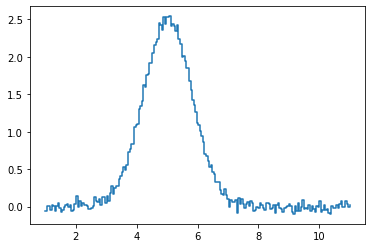

In [31]:
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models

np.random.seed(42)
spectral_axis = np.linspace(11., 1., 200) * u.GHz
spectral_model = models.Gaussian1D(amplitude=5*(2*np.pi*0.8**2)**-0.5*u.Jy, mean=5*u.GHz, stddev=0.8*u.GHz)
flux = spectral_model(spectral_axis)
flux += np.random.normal(0., 0.05, spectral_axis.shape) * u.Jy
uncertainty = StdDevUncertainty(0.2*np.ones(flux.shape)*u.Jy)
noisy_gaussian = Spectrum1D(spectral_axis=spectral_axis, flux=flux)#, uncertainty=uncertainty)
import matplotlib.pyplot as plt 
plt.step(noisy_gaussian.spectral_axis, noisy_gaussian.flux) 

In [56]:
line_flux(spec, SpectralRegion(6300*u.AA, 6302*u.AA))  

IndexError: ignored

In [33]:
type(noisy_gaussian)

specutils.spectra.spectrum1d.Spectrum1D

In [34]:
type(spec)

specutils.spectra.spectrum1d.Spectrum1D

In [36]:
noisy_gaussian

<Spectrum1D(flux=<Quantity [ 2.48357077e-02, -6.91321506e-03,  3.23844269e-02,
            7.61514928e-02, -1.17076687e-02, -1.17068478e-02,
            7.89606408e-02,  3.83717365e-02, -2.34737192e-02,
            2.71280023e-02, -2.31708845e-02, -2.32864875e-02,
            1.20981139e-02, -9.56640117e-02, -8.62458909e-02,
           -2.81143753e-02, -5.06415543e-02,  1.57123692e-02,
           -4.54011999e-02, -7.06151793e-02,  7.32824470e-02,
           -1.12888024e-02,  3.37642880e-03, -7.12373821e-02,
           -2.72190965e-02,  5.54618726e-03, -5.75495952e-02,
            1.87850217e-02, -3.00317610e-02, -1.45844391e-02,
           -3.00849765e-02,  9.26144121e-02, -6.74149908e-04,
           -5.28845442e-02,  4.11286522e-02, -6.10402162e-02,
            1.04459177e-02, -9.79797089e-02, -6.64040566e-02,
            9.85028020e-03,  3.69332226e-02,  8.58192091e-03,
           -5.76404704e-03, -1.50303069e-02, -7.38925357e-02,
           -3.59471062e-02, -2.29715648e-02,  5.29366

In [45]:
spec

<Spectrum1D(flux=<Quantity [-6.40669680e-17,  2.41048256e-17, -2.63085960e-17, ...,
            4.27114064e-17,  2.16660709e-17, -3.56825590e-18] erg / (Angstrom cm2 s)>, spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [ 3594.1809082 ,  3595.00976562,  3595.83666992, ..., 10384.84082031,
   10387.23632812, 10389.63085938] Angstrom>)>